# Malignant Classifier

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
df_1=pd.read_csv("Laptop Rating_cleaned.csv")
df_2=pd.read_csv("Smartphone Rating_cleaned.csv")
df_3=pd.read_csv("Headphone Rating_cleaned.csv")
df_4=pd.read_csv("Smart watch Rating_cleaned.csv")
df_5=pd.read_csv("DSLR Rating_cleaned.csv")
df_6=pd.read_csv("Printer Rating_cleaned.csv")
df_7=pd.read_csv("Monitor Rating_cleaned.csv")
df_8=pd.read_csv("Home theatre Rating_cleaned.csv")
df_9=pd.read_csv("Router Rating_cleaned.csv")

df=pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9])
df.head()

,Unnamed: 0,Rating,Heading,Review,Product
0,0,4.0,Delightful,Its Budget Friendly. And good .,Laptop
1,1,5.0,Simply awesome,nicely designed,Laptop
2,2,1.0,Don't waste your money,very bad qulity,Laptop
3,3,2.0,Expected a better product,It's the second day of my purchase and chargin...,Laptop
4,4,4.0,Pretty good,PRODUCT IS VERY GOOD,Laptop


* Before we begin further processing let's shuffle the data set and drop the non necessary column: 'Unnamed: 0'

In [4]:
from sklearn.utils import shuffle
df=shuffle(df)
df.reset_index(inplace=True,drop=True)

In [5]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [6]:
df.head()

,Rating,Heading,Review,Product
0,1.0,Horrible,This device is good but it's thickness very mo...,Smartphone
1,5.0,Super!,wonder ful,Monitor
2,1.0,Worthless,very low speaker sound,Laptop
3,4.0,Worth the money,Nice product in low amount,Monitor
4,4.0,Very Good,So far so good,Monitor


### Exploratory Data Analysis

In [7]:
#check the dimensions of the data
df.shape

(31435, 4)

* The dataset has 31435 rows and 4 columns

In [8]:
#check the names of columns in dataset
df.columns

Index(['Rating', 'Heading', 'Review', 'Product'], dtype='object')

In [9]:
#check the datatype of each feature
df.dtypes

Rating     float64
Heading     object
Review      object
Product     object
dtype: object

#### Observations:
   * There are three columns with "object" data type they are "Heading", "Review" and "Product".
   * There is one column (label) with float data type.

In [10]:
#checking if there are any null values in the dataset
df.isnull().sum()

Rating     0
Heading    0
Review     0
Product    0
dtype: int64

#### Observations:
   * There are no null values in the entire dataset

In [11]:
#check info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31435 entries, 0 to 31434
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rating   31435 non-null  float64
 1   Heading  31435 non-null  object 
 2   Review   31435 non-null  object 
 3   Product  31435 non-null  object 
dtypes: float64(1), object(3)
memory usage: 982.5+ KB


#### Observations
   * The info() method thus returns the data type as well as the non-null values and memory usage.
   * Out of the total of 4 columns 3 columns are "object" type while one of them is float datatype.

In [12]:
#check number of unique values in each class;
df.nunique()

Rating         5
Heading      963
Review     28872
Product        9
dtype: int64

#### Observations:
   * The rating column (label) has 5 unique values: 1, 2, 3, 4, 5
   * The heading feature has 963 unique values.
   * The product feature has 9 uinque values.

In [13]:
df['Rating'].value_counts()

5.0    8304
4.0    8100
1.0    7405
3.0    5145
2.0    2481
Name: Rating, dtype: int64

#### Observations:
* There are more number of 5 star rated reviews.
* There are very less number of 2 star rated reviews.
* The data set in not perfectly balanced.

In [14]:
#Separation of rating as different labels.
df['1 Star']=df.apply(lambda x: 1 if x['Rating']==1 else 0, axis=1)
df['2 Star']=df.apply(lambda x: 1 if x['Rating']==2 else 0, axis=1)
df['3 Star']=df.apply(lambda x: 1 if x['Rating']==3 else 0, axis=1)
df['4 Star']=df.apply(lambda x: 1 if x['Rating']==4 else 0, axis=1)
df['5 Star']=df.apply(lambda x: 1 if x['Rating']==5 else 0, axis=1)

In [15]:
df.head(20)

,Rating,Heading,Review,Product,1 Star,2 Star,3 Star,4 Star,5 Star
0,1.0,Horrible,This device is good but it's thickness very mo...,Smartphone,1,0,0,0,0
1,5.0,Super!,wonder ful,Monitor,0,0,0,0,1
2,1.0,Worthless,very low speaker sound,Laptop,1,0,0,0,0
3,4.0,Worth the money,Nice product in low amount,Monitor,0,0,0,1,0
4,4.0,Very Good,So far so good,Monitor,0,0,0,1,0
5,5.0,Wonderful,nice product ❤❤❤,DSLR,0,0,0,0,1
6,4.0,Good choice,Nice product very simple,Monitor,0,0,0,1,0
7,5.0,Perfect product!,Very gd,Router,0,0,0,0,1
8,3.0,Good,Redmi 9 Xiaomi chnge poco m3,Smartphone,0,0,1,0,0
9,4.0,Pretty good,Product is very good ...... Speed for upload a...,Router,0,0,0,1,0


In [16]:
df.drop(['Rating'], axis=1, inplace= True)

In [17]:
#statistical analysis
df.describe()

,1 Star,2 Star,3 Star,4 Star,5 Star
count,31435.000000,31435.000000,31435.000000,31435.000000,31435.000000
mean,0.235565,0.078925,0.163671,0.257675,0.264164
std,0.424358,0.269626,0.369983,0.437361,0.440894
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
 * For all the labels the minimun value is zero and maximum is 1. As there are only binary classes deviations cannot be studied

In [18]:
#checking the skewness
df.skew()

1 Star    1.246358
2 Star    3.123606
3 Star    1.818195
4 Star    1.108196
5 Star    1.069875
dtype: float64

#### observations
* The highest skewness is seen in 2 Star rating

# Visualizations

In [19]:
#import libraries required for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

average length of review: 63.0


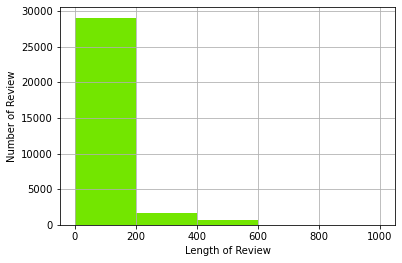

In [20]:
#plotting the average length of comments
review=df["Review"]
x = [len(review[i]) for i in range(review.shape[0])]

print('average length of review: {:.1f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000]
plt.hist(x, bins=bins,color='#73e600')
plt.xlabel('Length of Review')
plt.ylabel('Number of Review')       
plt.grid(True)
plt.show()

#### Observations:
* The average length of comments was 63.
* Maximumn number of comments had 0 to 200 words.
* There were no lengthy comments.
* Comments with 200 and above words were very few.

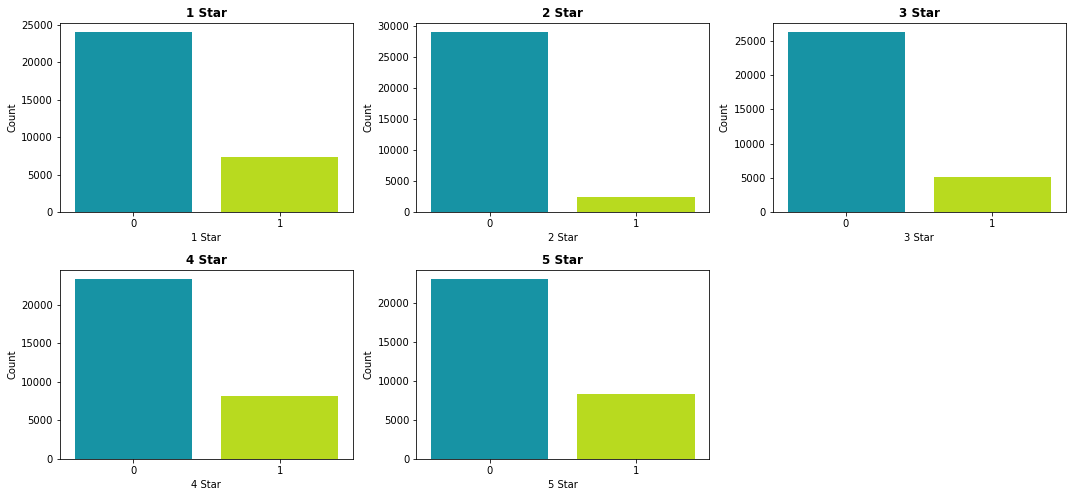

In [21]:
#let us plot countplot of each feature
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(15,10))
for cols in df.columns:
    if df[cols].dtypes=='int64':
        plt.subplot(a, b, c)
        plt.title('{}'.format(cols),weight='bold')
        sns.countplot(df[cols],palette='nipy_spectral')
        plt.xticks(rotation=360)
        c = c + 1
        plt.tight_layout()
        plt.ylabel("Count")
plt.show()

#### Obseravtions:
   * For all type of comments the value count for class "1" is very less as compared to the value count for class"0"

In [22]:
categories = list(df.columns.values)
categories

['Heading',
 'Review',
 'Product',
 '1 Star',
 '2 Star',
 '3 Star',
 '4 Star',
 '5 Star']

In [23]:
#make a list of columns
categories = list(df.columns.values)
categories = categories[3:]
print(categories)

['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']


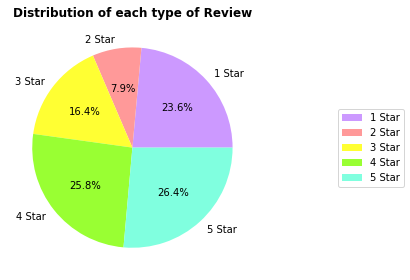

In [24]:
#distribution plot of each type of review
colors=['#cc99ff','#ff9999','#ffff33','#99ff33','#80ffdf'] 
df_distribution = df[categories].sum()

df_distribution.plot.pie(y='count',autopct='%1.1f%%',colors=colors)\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.ylabel("")
plt.title("Distribution of each type of Review",fontweight='bold')
plt.tight_layout()
plt.show()

#### Observations:
* 5 Star rating had the highest share of all which was 26.4%
* 4 Star rating  were second highest and 1 Star rating had 23.6% of share in the total distribution.
* 2 Star rating very least(7.9%)

In [25]:
# Calculating number of reviews in each category

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['Category', 'Number of Reviews'])
df_stats

,Category,Number of Reviews
0,1 Star,7405
1,2 Star,2481
2,3 Star,5145
3,4 Star,8100
4,5 Star,8304


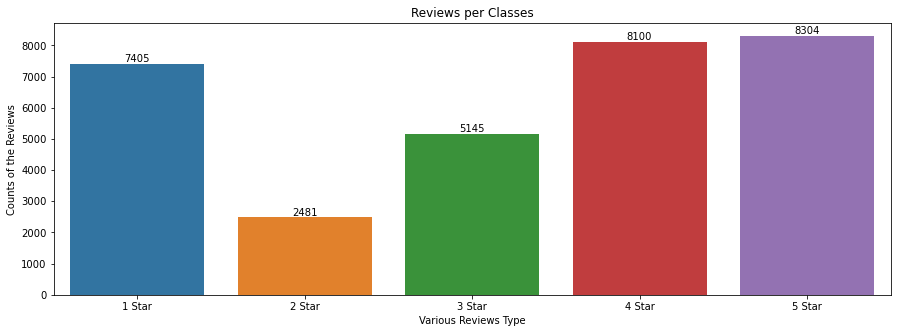

In [26]:
# Checking the count of the various types of reviews
cols = ['1 Star', '2 Star', '3 Star', '4 Star', '5 Star']
val_counts = df[cols].sum()

plt.figure(figsize=(15,5))
ax = sns.barplot(val_counts.index, val_counts.values)

plt.title("Reviews per Classes")
plt.xlabel("Various Reviews Type")
plt.ylabel("Counts of the Reviews")

rects = ax.patches
labels = val_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha="center", va="bottom")


plt.show()

#### Observations
* There were 8304 5 Star rated reviews which are maximum. 4 Star reviews were second highest.
* 2 Star ratings count was only 478 which is the least.
* 1 Star and 3 Star ratings were moderate in number.

#### Observations:
   * we can observe the words with higher font had high frequncy .
   * Various abusing words are highlighted in the wordcloud above as per the toxicity level.

##  Data Pre-Processing

As the dataset is too large and we do not have enough ram to process the same we shall take few random samples to train and save the model

In [27]:
#convert all text into lowercase 
df['Review'] = df['Review'].str.lower()
df['Heading'] = df['Heading'].str.lower()
#check if the text is lower cased
df.head()

,Heading,Review,Product,1 Star,2 Star,3 Star,4 Star,5 Star
0,horrible,this device is good but it's thickness very mo...,Smartphone,1,0,0,0,0
1,super!,wonder ful,Monitor,0,0,0,0,1
2,worthless,very low speaker sound,Laptop,1,0,0,0,0
3,worth the money,nice product in low amount,Monitor,0,0,0,1,0
4,very good,so far so good,Monitor,0,0,0,1,0


In [28]:
#clean all html tags 
import re
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
#apply the function 
df['Review'] = df['Review'].apply(cleanHtml)
df['Heading'] = df['Heading'].apply(cleanHtml)
df.head()

,Heading,Review,Product,1 Star,2 Star,3 Star,4 Star,5 Star
0,horrible,this device is good but it's thickness very mo...,Smartphone,1,0,0,0,0
1,super!,wonder ful,Monitor,0,0,0,0,1
2,worthless,very low speaker sound,Laptop,1,0,0,0,0
3,worth the money,nice product in low amount,Monitor,0,0,0,1,0
4,very good,so far so good,Monitor,0,0,0,1,0


In [29]:
#remove punctuations
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
#call the function
df['Review'] = df['Review'].apply(cleanPunc)
df['Heading'] = df['Heading'].apply(cleanPunc)
df.head()

,Heading,Review,Product,1 Star,2 Star,3 Star,4 Star,5 Star
0,horrible,this device is good but its thickness very mor...,Smartphone,1,0,0,0,0
1,super,wonder ful,Monitor,0,0,0,0,1
2,worthless,very low speaker sound,Laptop,1,0,0,0,0
3,worth the money,nice product in low amount,Monitor,0,0,0,1,0
4,very good,so far so good,Monitor,0,0,0,1,0


In [30]:
# any alphabets from small a to small z or capital A to capital Z.
#The plus sign specifies that string should have at least one character.
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
#apply the function
df['Review'] = df['Review'].apply(keepAlpha)
df['Heading'] = df['Heading'].apply(keepAlpha)
df.head()

,Heading,Review,Product,1 Star,2 Star,3 Star,4 Star,5 Star
0,horrible,this device is good but its thickness very mor...,Smartphone,1,0,0,0,0
1,super,wonder ful,Monitor,0,0,0,0,1
2,worthless,very low speaker sound,Laptop,1,0,0,0,0
3,worth the money,nice product in low amount,Monitor,0,0,0,1,0
4,very good,so far so good,Monitor,0,0,0,1,0


In [31]:
#cleaned data
df.head()

,Heading,Review,Product,1 Star,2 Star,3 Star,4 Star,5 Star
0,horrible,this device is good but its thickness very mor...,Smartphone,1,0,0,0,0
1,super,wonder ful,Monitor,0,0,0,0,1
2,worthless,very low speaker sound,Laptop,1,0,0,0,0
3,worth the money,nice product in low amount,Monitor,0,0,0,1,0
4,very good,so far so good,Monitor,0,0,0,1,0


In [32]:
#import libraries for stemming and stopwords removal
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

In [33]:
#removing stopwords
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
#apply the remove_stopwords function
df['Review'] = df['Review'].apply(removeStopWords)
df['Heading'] = df['Heading'].apply(removeStopWords)
df.head()

,Heading,Review,Product,1 Star,2 Star,3 Star,4 Star,5 Star
0,horrible,device good thickness weight so,Smartphone,1,0,0,0,0
1,super,wonder ful,Monitor,0,0,0,0,1
2,worthless,low speaker sound,Laptop,1,0,0,0,0
3,worth money,nice product low amount,Monitor,0,0,0,1,0
4,good,far good,Monitor,0,0,0,1,0


In [34]:
#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['Review'] = df['Review'].apply(stemming)
df['Heading'] = df['Heading'].apply(stemming)
df.head()

,Heading,Review,Product,1 Star,2 Star,3 Star,4 Star,5 Star
0,horribl,devic good thick weight so,Smartphone,1,0,0,0,0
1,super,wonder ful,Monitor,0,0,0,0,1
2,worthless,low speaker sound,Laptop,1,0,0,0,0
3,worth money,nice product low amount,Monitor,0,0,0,1,0
4,good,far good,Monitor,0,0,0,1,0


In [35]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [36]:
import emoji
def emoji_remover(text):
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text

df['Review'] = df['Review'].apply(emoji_remover)
df['Heading'] = df['Heading'].apply(emoji_remover)
df.head()

,Heading,Review,Product,1 Star,2 Star,3 Star,4 Star,5 Star
0,horribl,devic good thick weight so,Smartphone,1,0,0,0,0
1,super,wonder ful,Monitor,0,0,0,0,1
2,worthless,low speaker sound,Laptop,1,0,0,0,0
3,worth money,nice product low amount,Monitor,0,0,0,1,0
4,good,far good,Monitor,0,0,0,1,0


In [37]:
df_dummies=pd.get_dummies(df['Product'],drop_first=False)
df=df.join(df_dummies)

In [38]:
df.head()

,Heading,Review,Product,1 Star,2 Star,3 Star,4 Star,5 Star,DSLR,Headphone,Home theatre,Laptop,Monitor,Printer,Router,Smart watch,Smartphone
0,horribl,devic good thick weight so,Smartphone,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,super,wonder ful,Monitor,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,worthless,low speaker sound,Laptop,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,worth money,nice product low amount,Monitor,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,good,far good,Monitor,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [39]:
df.isna().sum()

Heading         0
Review          0
Product         0
1 Star          0
2 Star          0
3 Star          0
4 Star          0
5 Star          0
DSLR            0
Headphone       0
Home theatre    0
Laptop          0
Monitor         0
Printer         0
Router          0
Smart watch     0
Smartphone      0
dtype: int64

In [40]:
df.drop(['Product'],axis=1,inplace=True)

In [41]:
df.head()

,Heading,Review,1 Star,2 Star,3 Star,4 Star,5 Star,DSLR,Headphone,Home theatre,Laptop,Monitor,Printer,Router,Smart watch,Smartphone
0,horribl,devic good thick weight so,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,super,wonder ful,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,worthless,low speaker sound,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,worth money,nice product low amount,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,good,far good,0,0,0,1,0,0,0,0,0,1,0,0,0,0


### Train-Test Split

In [49]:
# assigning heading to x
x = df['Heading']
z = df['Review']
feature = df[['Headphone','Laptop','Monitor','Printer','Router','Smart watch','Smartphone']]
y = df[['1 Star','2 Star','3 Star','4 Star','5 Star']]

In [50]:
x.head()

0        horribl
1          super
2      worthless
3    worth money
4           good
Name: Heading, dtype: object

In [51]:
z.head()

0    devic good thick weight so
1                    wonder ful
2             low speaker sound
3       nice product low amount
4                      far good
Name: Review, dtype: object

In [44]:
y.head()

,1 Star,2 Star,3 Star,4 Star,5 Star
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [52]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
x = tf.fit_transform(x)

In [58]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

### Understanding few concepts before actual model building

### Studying the evaluation metrics

#### 1) Label ranking average precision (LRAP)
It is the average over each ground truth label assigned to each sample, of the ratio of true vs. total labels with lower score.

This metric is used in multilabel ranking problem, where the goal is to give better rank to the labels associated to each sample.

* The obtained score is always strictly greater than 0 and the best value is 1.

#### 2) Ranking loss measure.

Compute the average number of label pairs that are incorrectly ordered given y_score weighted by the size of the label set and the number of labels not in the label set.

This is similar to the error set size, but weighted by the number of relevant and irrelevant labels.  The best performance is achieved with a ranking loss of zero.

#### 3) Hamming loss
it is important to note that unlikely accuracy in hamming loss the smaller the result is the better is the model. for an example if hamming loss, is 0.32 which means that if you are trying to predict the aspects of 100 sentences the model will predict incorrectly about 32% of the independent aspects.
* hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 4) Precision
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The best value is 1 and the worst value is 0.

#### 5) Coverage error
Coverage error measure.

Compute how far we need to go through the ranked scores to cover all true labels. The best value is equal to the average number of labels in y_true per sample.
* The best value of coverage is when it is equal to average number of true class labels.

#### 6) Log loss
This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true . The log loss is only defined for two or more labels.
The bolder the probabilities, the better will be your Log Loss — closer to zero. It is a measure of uncertainty (you may call it entropy), so a low Log Loss means a low uncertainty/entropy of your model. 

#### 7) Hamming loss
The Hamming loss is the fraction of labels that are incorrectly predicted.
hamming loss value ranges from 0 to 1. Lesser value of hamming loss indicates a better classifier.

#### 8)  Confusion matrix for multi-label
In multilabel confusion matrix MCM, the count of true negatives is MCM(0,0) , false negatives is MCM(1,0), true positives is MCM(1,1)  and false positives is(0,1) .



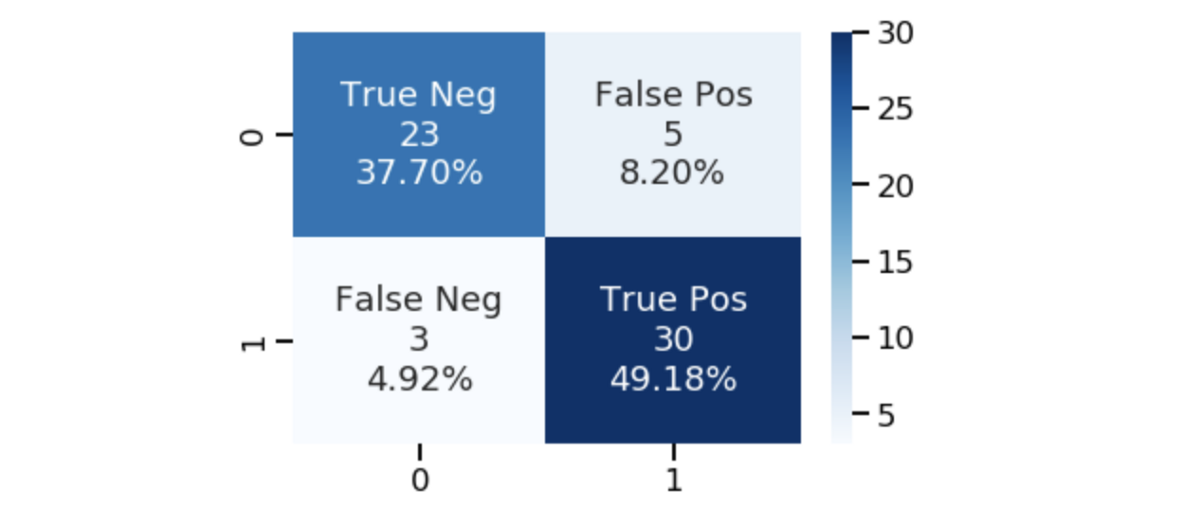

In [56]:
#importing libraries for evaluation
from sklearn.metrics import hamming_loss,accuracy_score,log_loss,f1_score
from sklearn.metrics import coverage_error,precision_score,label_ranking_average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.model_selection import cross_val_score

# Building model based on Heading of review

### 1) Power Transformation

### 1.1 Binary relevance with GuassianNb as base classifier

In [59]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,x,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  29.278534164651994
Cross validation score= 32.546576958229046


log loss= 1.075236169639573
hamming loss= 0.2594223183611146


f1 score= 0.6036855609983671
average precision score= 0.4346414376084644
AUC ROC score= 0.8318442397240627


 label ranking average precision score= 0.5685816685753053
coverage area= 2.314798320396997




In [60]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[4591, 1360],
        [  21, 1887]],

       [[5017, 2241],
        [  17,  584]],

       [[4303, 2235],
        [  27, 1294]],

       [[4356, 1450],
        [  21, 2032]],

       [[3070, 2813],
        [   9, 1967]]])

#### Observations:
   * For label(1) i.e malignant class there are 17 True positives and 324 True Negatives and (17+42) i.e 59 errorneous values (FP and FN ) 
   * For label(2) i.e highly_malignant class there is 1 True positives and 392 True Negatives and (5+2) i.e 7 errorneous values (FP and FN )    
   * For label(3) i.e rude class there are 7 True positives and 360 True Negatives and (14+19) i.e 33 errorneous values (FP and FN )
   * For label(4) i.e threat class there is 0 True positives and 396 True Negatives and (3+1) i.e 4 errorneous values (FP and FN )  
   * For label(5) i.e abuse class there are 7 True positives and 362 True Negatives and (18+13) i.e 31 errorneous values (FP and FN )
   * For label(6) i.e loathe class there is 0 True positives and 396 True Negatives and (3+1) i.e 4 errorneous values (FP and FN )

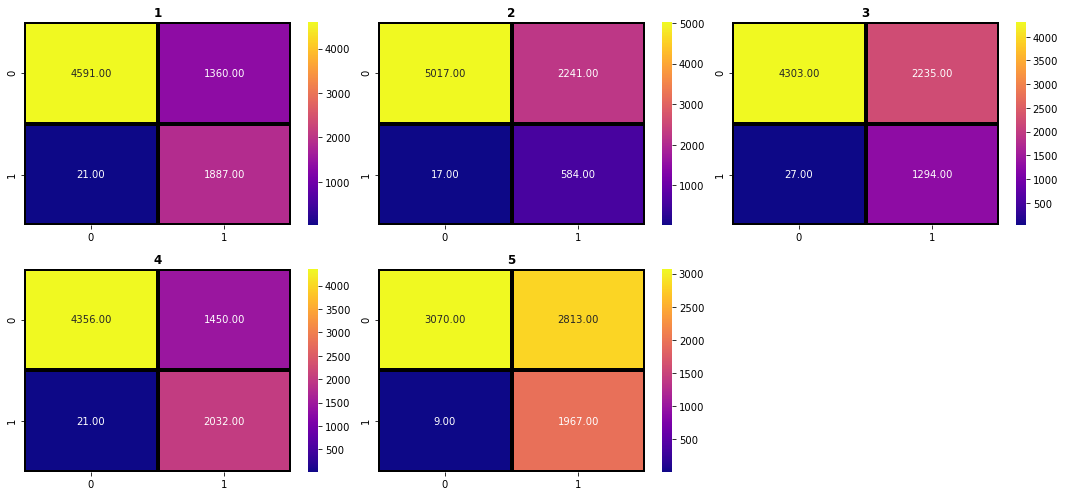

In [68]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 1.2 Label powerset

In [63]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,x,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_lps)

Accuracy =  77.37625652118591
Cross validation score= 78.75945342118384


log loss= 7.813964172305793
hamming loss= 0.09049497391525639


AUC ROC score= 0.8561146042395139
f1 score= 0.773762565211859
average precision score= 0.773762565211859


coverage area= 1.904949739152564
 label ranking average precision score= 0.8190100521694615


In [64]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[5925,   26],
        [ 140, 1768]],

       [[6910,  348],
        [ 128,  473]],

       [[6506,   32],
        [ 468,  853]],

       [[5780,   26],
        [1032, 1021]],

       [[4537, 1346],
        [  10, 1966]]])

#### Observations:
   * For label(1) i.e malignant class there are 11 True positives and 343 True Negatives and (23+23) i.e 46 errorneous values (FP and FN )
   
   * For label(2) i.e highly_malignant class there is 0 True positives and 392 True Negatives and 8 errorneous values (FP and FN )
   
   * For label(3) i.e rude class there are 7 True positives and 370 True Negatives and (14+9) i.e 23 errorneous values (FP and FN )
   
   * For label(4) i.e threat class there is 0 True positives and 396 True Negatives and 4 errorneous values (FP and FN )

   * For label(5) i.e abuse class there are 6 True positives and 369 True Negatives and (14+11) i.e 25 errorneous values (FP and FN )
   * For label(6) i.e loathe class there is 0 True positives and 397 True Negatives and 3 errorneous values (FP and FN )

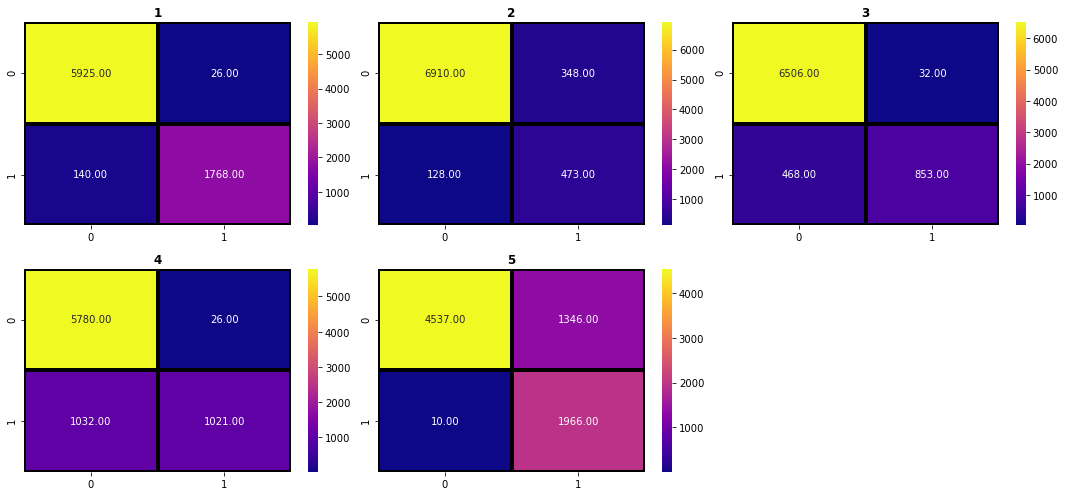

In [67]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [69]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,x,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_cc)

Accuracy =  89.75696653518258
Cross validation score= 89.49897358774666


log loss= 3.487538228287749
hamming loss= 0.040666751495101156


AUC ROC score= 0.919879134867019
f1 score= 0.8982554437794473
average precision score= 0.8989422709315662


coverage area= 1.4097213385926963
 label ranking average precision score= 0.9180557322814484


In [70]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[5924,   27],
        [  30, 1878]],

       [[7225,   33],
        [ 126,  475]],

       [[6508,   30],
        [ 454,  867]],

       [[5133,  673],
        [  64, 1989]],

       [[5853,   30],
        [ 131, 1845]]])

#### Observations:
   * For label(1) i.e malignant class there are 5 True positives and 366 True Negatives and 29 errorneous values (FP and FN )
   
   * For label(2) i.e highly_malignant class there is 0 True positives and 394 True Negatives and 6 errorneous values (FP and FN )
   
   * For label(3) i.e rude class there are 5 True positives and 379 True Negatives and 16 errorneous values (FP and FN )
   
   * For label(4) i.e threat class there is 0 True positives and 397 True Negatives and 3 errorneous value (FP and FN )
   
   * For label(5) i.e abuse class there are 4 True positives and 379 True Negatives and (16+1) i.e 17 errorneous values (FP and FN )
   
   * For label(6) i.e loathe class there is 0 True positives and 397 True Negatives and 3 errorneous values (FP and FN )

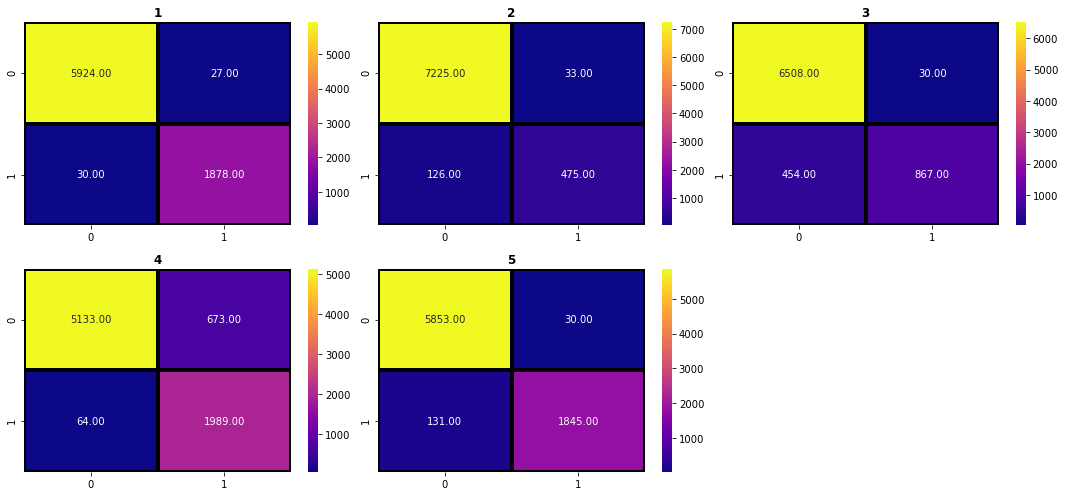

In [71]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

### 3) Adapted Algorithm
Adapted algorithm, as the name suggests, adapting the algorithm to directly perform multi-label classification, rather than transforming the problem into different subsets of problems.

For example, multi-label version of kNN is represented by MLkNN. So, let us quickly implement this on our randomly generated data set.

In [72]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,x,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  86.02875683929253
Cross validation score= 88.9327150469783


log loss= 0.555869775794417
hamming loss= 0.02995292021885736


AUC ROC score= 0.9201866136669441
f1 score= 0.9199265256139874
average precision score= 0.9884502923976608


 label ranking average precision score= 0.8882300547143239
coverage area= 1.5588497264282988


In [73]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[5908,   43],
        [  38, 1870]],

       [[7256,    2],
        [ 142,  459]],

       [[6531,    7],
        [ 293, 1028]],

       [[5795,   11],
        [ 492, 1561]],

       [[5867,   16],
        [ 133, 1843]]])

#### Observations:
   * For label(1) i.e malignant class there are 8 True positives and 363 True Negatives and (26+3) i.e 29 errorneous values (FP and FN )
   
   * For label(2) i.e highly_malignant class there are 4 True positives and 391 True Negatives and (3+2) i.e 5 errorneous values (FP and FN )

   
   * For label(3) i.e rude class there are 8 True positives and 377 True Negatives and (13+2) i.e 15 errorneous values (FP and FN )
   
   * For label(4) i.e threat class there is 1 True positives and 397 True Negatives and 2 errorneous value (FP and FN )
   
   * For label(5) i.e abuse class there are 6 True positives and 377 True Negatives and (14+3) i.e 17 errorneous values (FP and FN )
   
   * For label(6) i.e loathe class there is 0 True positives and 396 True Negatives and 4 errorneous values (FP and FN )

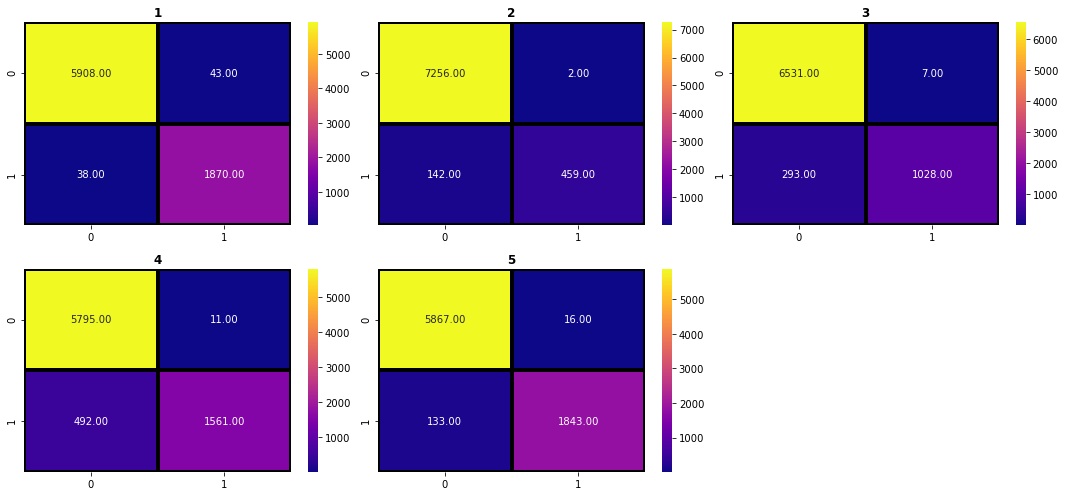

In [74]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
  

### Comparing all the models performance

In [75]:
#creating a comparision table for better understanding

df_comparison=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Classifier chain,89.756967,89.498974,0.040667,3.487538,0.919879,0.898255,0.898942,1.409721,0.918056
1,Adapted algorithm,86.028757,88.932715,0.029953,0.555870,0.920187,0.919927,0.988450,1.558850,0.888230
2,Label powerset,77.376257,78.759453,0.090495,7.813964,0.856115,0.773763,0.773763,1.904950,0.819010
3,Binary Relevance,29.278534,32.546577,0.259422,1.075236,0.831844,0.603686,0.434641,2.314798,0.568582


# Building model based on actual reviews and evaluation of its performance

In [76]:
#transforming words to vectors
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
#convert text into vectors
z = tf.fit_transform(z)

In [80]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.25, random_state=123)

# 1) Power Transformation
# 1.1 Binary relevance with GuassianNb as base classifier

In [81]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier1 = BinaryRelevance(GaussianNB())

# train
classifier1.fit(x_train, y_train)
# predict
predictions = classifier1.predict(x_test)

# accuracy
acc_br=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_br)
#cross validation score
cv_br=cross_val_score(classifier1,x,y,cv=3).mean()*100
print("Cross validation score=",cv_br)
print("\n")

#log loss
loss_br=log_loss(y_test,predictions.toarray())
print("log loss=",loss_br)
#hamming loss
hamm_loss_br=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_br) 
print("\n")


#f1 score
f1_br=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_br)
#precision score micro averaged
pre_br=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_br)
#auc roc curve
auc_br=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_br)
print("\n")


#label ranking 
lr_br=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_br)
#coverage error
ce_br=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_br)
print("\n")

Accuracy =  3.6391398396742587
Cross validation score= 32.546576958229046


log loss= 4.871155336047757
hamming loss= 0.6236925817534037


f1 score= 0.36117193201960174
average precision score= 0.2271103097852811
AUC ROC score= 0.5541169042907516


 label ranking average precision score= 0.2687173940705067
coverage area= 4.297875047715994




In [82]:
#confusion matrix for binary relevance
conf_mat1=multilabel_confusion_matrix(y_test,predictions)
conf_mat1

array([[[1050, 4901],
        [ 215, 1693]],

       [[1700, 5558],
        [ 175,  426]],

       [[ 855, 5683],
        [ 209, 1112]],

       [[1164, 4642],
        [ 216, 1837]],

       [[3090, 2793],
        [ 116, 1860]]])

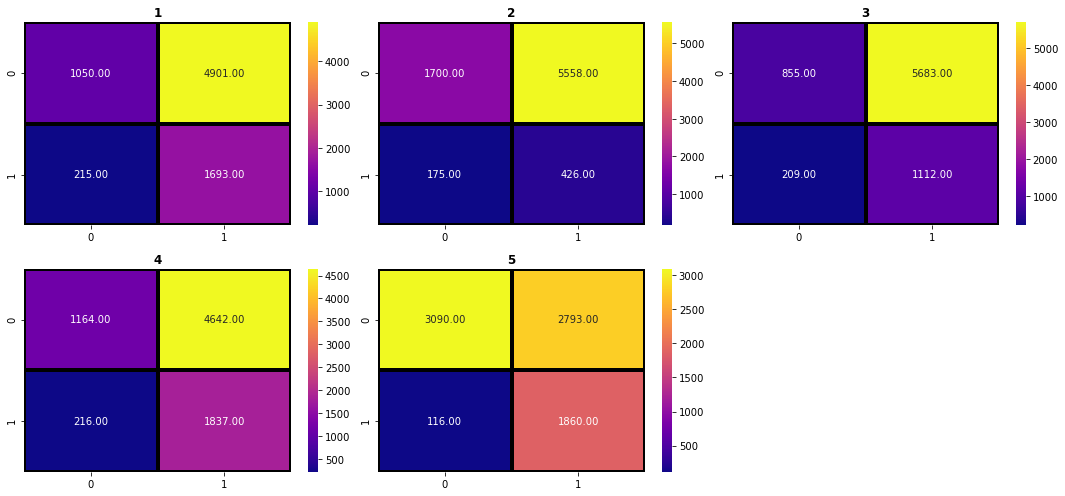

In [83]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5):
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat1[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 1.2 Label powerset

In [85]:
#create and fit classifier
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier2 = LabelPowerset(GaussianNB())
classifier2.fit(x_train, y_train)
#predictions
predictions = classifier2.predict(x_test)

# accuracy
acc_lps=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_lps)
#cross validation score
cv_lps=cross_val_score(classifier2,x,y,cv=3).mean()*100
print("Cross validation score=",cv_lps)
print("\n")

#log loss
loss_lps=log_loss(y_test,predictions.toarray())
print("log loss=",loss_lps)
#hamming loss
hamm_loss_lps=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_lps)
print("\n")

#auc roc score
auc_lps=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_lps)
#f1 score
f1_lps=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_lps)
#precision score micro averaged
pre_lps=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_lps)
print("\n")

#coverage error
ce_lps=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_lps)
#label ranking 
lr_lps=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_lps)

Accuracy =  32.98129533019468
Cross validation score= 78.75945342118384


log loss= 23.14744054866963
hamming loss= 0.2680748186792213


AUC ROC score= 0.578042390052357
f1 score= 0.3298129533019468
average precision score= 0.3298129533019468


coverage area= 3.6807481867922127
 label ranking average precision score= 0.46385036264151475


In [86]:
#confusion matrix for label powerset
conf_mat2=multilabel_confusion_matrix(y_test,predictions)
conf_mat2

array([[[5751,  200],
        [1740,  168]],

       [[5646, 1612],
        [ 367,  234]],

       [[6206,  332],
        [1176,  145]],

       [[5463,  343],
        [1866,  187]],

       [[3103, 2780],
        [ 118, 1858]]])

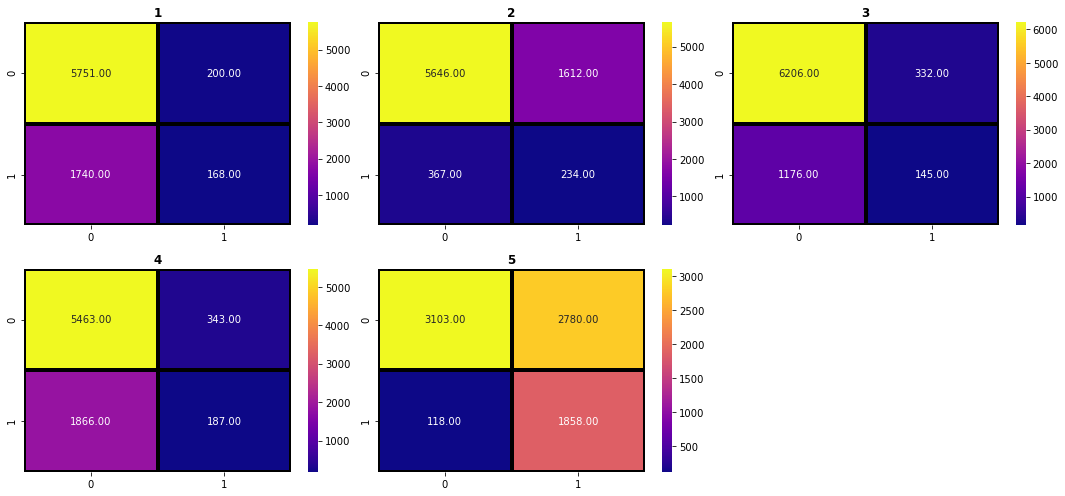

In [88]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat2[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 2 ) Classifier chain with MultinomialNB classifier (ensemble)

In [89]:
#create and fit classifier
from sklearn.naive_bayes import MultinomialNB
from skmultilearn.problem_transform import ClassifierChain
classifier3 = ClassifierChain(MultinomialNB())
classifier3.fit(x_train, y_train)

#predictions
predictions = classifier3.predict(x_test)
# accuracy
acc_cc=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_cc)
#cross validation score
cv_cc=cross_val_score(classifier3,x,y,cv=3).mean()*100
print("Cross validation score=",cv_cc)
print("\n")

#log loss
loss_cc=log_loss(y_test,predictions.toarray())
print("log loss=",loss_cc)
#hamming loss
hamm_loss_cc=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_cc)
print("\n")

#auc roc score
auc_cc=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_cc)
#f1 score
f1_cc=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_cc)
#precision score micro averaged
pre_cc=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_cc)
print("\n")

#coverage error
ce_cc=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_cc)

#label ranking 
lr_cc=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_cc)

Accuracy =  29.22763710395725
Cross validation score= 89.49897358774666


log loss= 5.965936073389936
hamming loss= 0.17086143275225857


AUC ROC score= 0.5992808318648641
f1 score= 0.4062610541209763
average precision score= 0.6659901420701653


coverage area= 3.83089451584171
 label ranking average precision score= 0.43382109683161924


In [90]:
#confusion matrix for classifier chain
conf_mat3=multilabel_confusion_matrix(y_test,predictions)
conf_mat3

array([[[5757,  194],
        [1181,  727]],

       [[7256,    2],
        [ 600,    1]],

       [[6452,   86],
        [1247,   74]],

       [[5483,  323],
        [1640,  413]],

       [[5336,  547],
        [ 894, 1082]]])

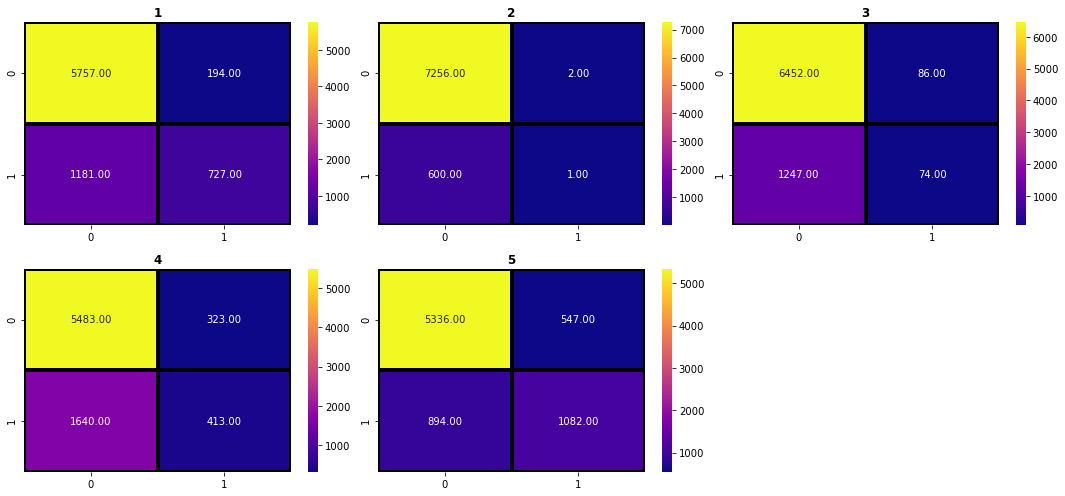

In [91]:
#plotting heatmap of confusion matrix
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat3[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()

# 3) Adapted Algorithm

In [92]:
from skmultilearn.adapt import MLkNN
classifier4 = MLkNN(k=3)
# train
classifier4.fit(x_train, y_train.values)
#predictions
predictions = classifier4.predict(x_test)

# accuracy
acc_mlknn=accuracy_score(y_test,predictions)*100
print("Accuracy = ",acc_mlknn)
#cross validation score
cv_mlknn=cross_val_score(classifier4,x,y.values,cv=3).mean()*100
print("Cross validation score=",cv_mlknn)
print("\n")

#log loss
loss_mlknn=log_loss(y_test,predictions.toarray())
print("log loss=",loss_mlknn)
#hamming loss
hamm_loss_mlknn=hamming_loss(y_test,predictions)
print("hamming loss=",hamm_loss_mlknn)
print("\n")

#auc roc score
auc_mlknn=roc_auc_score(y_test,predictions.toarray())
print("AUC ROC score=",auc_mlknn)
#f1 score
f1_mlknn=f1_score(y_test,predictions.toarray(),average='micro')
print("f1 score=",f1_mlknn)
#precision score micro averaged
pre_mlknn=precision_score(y_test,predictions.toarray(),average='micro')
print("average precision score=",pre_mlknn)
print("\n")

#label ranking 
lr_mlknn=label_ranking_average_precision_score(y_test,predictions.toarray())
print(" label ranking average precision score=",lr_mlknn)
#coverage error
ce_mlknn=coverage_error(y_test,predictions.toarray())
print("coverage area=",ce_mlknn)

Accuracy =  33.96106374856852
Cross validation score= 88.9327150469783


log loss= 11.952041681878818
hamming loss= 0.20139966916910548


AUC ROC score= 0.6048604224629275
f1 score= 0.42376583660987327
average precision score= 0.49531914893617024


 label ranking average precision score= 0.4808881537090805
coverage area= 3.549561012851508


In [93]:
#confusion matrix for mlknn
conf_mat4=multilabel_confusion_matrix(y_test,predictions)
conf_mat4

array([[[4955,  996],
        [ 903, 1005]],

       [[7143,  115],
        [ 579,   22]],

       [[6226,  312],
        [1179,  142]],

       [[5206,  600],
        [1584,  469]],

       [[4941,  942],
        [ 704, 1272]]])

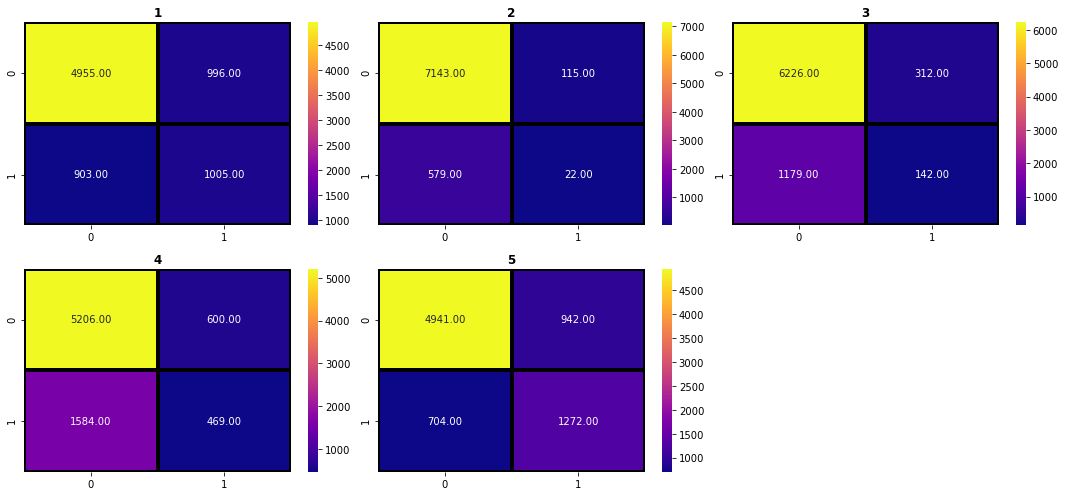

In [94]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(15,7))
for i in range(0,5): 
    plt.subplot(a, b, c)
    plt.title('{}'.format(i+1),weight='bold')
    sns.heatmap(conf_mat4[i],annot=True,cmap='plasma',fmt="0.2f",linewidths=3,linecolor='black')
    c = c + 1
    plt.tight_layout()
plt.show()
  

# Comparing all the models performance

In [95]:
#creating a comparision table for better understanding

df_comparison2=pd.DataFrame({
    "Model":['Binary Relevance',"Classifier chain","Label powerset","Adapted algorithm"],
    "Accuracy Score":[acc_br,acc_cc,acc_lps,acc_mlknn],
    "Cross Validation score":[cv_br,cv_cc,cv_lps,cv_mlknn],
    "Hamming Loss":[hamm_loss_br,hamm_loss_cc,hamm_loss_lps,hamm_loss_mlknn],
    "Log Loss":[loss_br,loss_cc,loss_lps,loss_mlknn],
    " Auc-Roc score":[auc_br,auc_cc,auc_lps,auc_mlknn],
    "F1 Score":[f1_br,f1_cc,f1_lps,f1_mlknn],
    "Precision":[pre_br,pre_cc,pre_lps,pre_mlknn],
    "coverage error":[ce_br,ce_cc,ce_lps,ce_mlknn],
    "Label ranking":[lr_br,lr_cc,lr_lps,lr_mlknn]})
    

df_comparison2.sort_values(by="Accuracy Score",ascending=False,ignore_index=True)

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking
0,Adapted algorithm,33.961064,88.932715,0.201400,11.952042,0.604860,0.423766,0.495319,3.549561,0.480888
1,Label powerset,32.981295,78.759453,0.268075,23.147441,0.578042,0.329813,0.329813,3.680748,0.463850
2,Classifier chain,29.227637,89.498974,0.170861,5.965936,0.599281,0.406261,0.665990,3.830895,0.433821
3,Binary Relevance,3.639140,32.546577,0.623693,4.871155,0.554117,0.361172,0.227110,4.297875,0.268717


# Comparison of Model performance for heading and review

In [96]:
df_comparison['Data']='Heading'
df_comparison2['Data']='Review'
df_merged=pd.concat([df_comparison,df_comparison2])
df_merged

,Model,Accuracy Score,Cross Validation score,Hamming Loss,Log Loss,Auc-Roc score,F1 Score,Precision,coverage error,Label ranking,Data
0,Binary Relevance,29.278534,32.546577,0.259422,1.075236,0.831844,0.603686,0.434641,2.314798,0.568582,Heading
1,Classifier chain,89.756967,89.498974,0.040667,3.487538,0.919879,0.898255,0.898942,1.409721,0.918056,Heading
2,Label powerset,77.376257,78.759453,0.090495,7.813964,0.856115,0.773763,0.773763,1.904950,0.819010,Heading
3,Adapted algorithm,86.028757,88.932715,0.029953,0.555870,0.920187,0.919927,0.988450,1.558850,0.888230,Heading
0,Binary Relevance,3.639140,32.546577,0.623693,4.871155,0.554117,0.361172,0.227110,4.297875,0.268717,Review
1,Classifier chain,29.227637,89.498974,0.170861,5.965936,0.599281,0.406261,0.665990,3.830895,0.433821,Review
2,Label powerset,32.981295,78.759453,0.268075,23.147441,0.578042,0.329813,0.329813,3.680748,0.463850,Review
3,Adapted algorithm,33.961064,88.932715,0.201400,11.952042,0.604860,0.423766,0.495319,3.549561,0.480888,Review


# Building model based on both Heading and Review

In [101]:
xz = pd.concat([x,z])

TypeError: cannot concatenate object of type '<class 'scipy.sparse.csr.csr_matrix'>'; only Series and DataFrame objs are valid

### Saving the best model

In [55]:
#saving classifier chain as our best model
import pickle
filename="malignant_model.pkl"
pickle.dump(classifier3,open(filename,'wb'))

In [56]:
actual=np.array(y_test)
predicted=classifier2.predict(x_test)

In [57]:
#converting the sparse matrix of predictions into array
pre=predicted.toarray().astype('int64')
pre

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [58]:
print(len(pre))
print(len(actual))

400
400


In [59]:
#making a dataframe of actual and predicted values
def makeDataFrame(a,b, cols = y_train.columns):
    a =  pd.DataFrame(a, columns=["actual_"+ i for i in cols ])
    b =  pd.DataFrame(b, columns=["predicted_"+ i for i in cols ])
    return pd.concat([a,b], axis=1)
df_compare=makeDataFrame(actual, pre)
df_compare

,actual_malignant,actual_highly_malignant,actual_rude,actual_threat,actual_abuse,actual_loathe,predicted_malignant,predicted_highly_malignant,predicted_rude,predicted_threat,predicted_abuse,predicted_loathe
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,1,0,0,0,0,0
396,0,0,0,0,0,0,1,0,0,0,0,0
397,0,0,0,0,0,0,0,0,0,0,0,0
398,0,0,0,0,0,0,0,0,0,0,0,0


### Importing the test data

In [61]:
df_test=pd.read_csv("test.csv")
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [62]:
#check the shape
df_test.shape

(153164, 2)

In [63]:
#check if there are any null values
df_test.isnull().any()

id              False
comment_text    False
dtype: bool

### Perform all the preprocessing steps that were performed on the train data

In [64]:
df_test['comment_text'] =df_test['comment_text'].str.lower()
df_test['comment_text'] = df_test['comment_text'].apply(cleanHtml)
df_test['comment_text'] = df_test['comment_text'].apply(cleanPunc)
df_test['comment_text'] = df_test['comment_text'].apply(keepAlpha)
df_test['comment_text'] = df_test['comment_text'].apply(removeStopWords)
df_test['comment_text'] = df_test['comment_text'].apply(stemming)
df_test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succes youll ever what hate s...
1,0000247867823ef7,rfc titl fine imo
2,00013b17ad220c46,sourc zaw ashton lapland
3,00017563c3f7919a,look back sourc inform updat correct form gues...
4,00017695ad8997eb,dont anonym edit articl all


In [65]:
df_test.drop(columns="id",axis=1,inplace=True)
df_test.sample()

,comment_text
116466,also cnn link appear dead now


In [66]:
# assigning comments to x
x = df_test['comment_text']
print(x.sample)

<bound method NDFrame.sample of 0         yo bitch ja rule succes youll ever what hate s...
1                                         rfc titl fine imo
2                                  sourc zaw ashton lapland
3         look back sourc inform updat correct form gues...
4                               dont anonym edit articl all
                                ...                        
153159                      total agre stuff noth long crap
153160    throw field home plate get faster throw cut ma...
153161    okinotorishima categori see chang agre correct...
153162    one found nation eu germani law return quit si...
153163    stop alreadi bullshit welcom im fool think kin...
Name: comment_text, Length: 153164, dtype: object>


In [67]:
#initiate tfid
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features =2000)
#convert text into vectors
x = tf.fit_transform(x)
x

<153164x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2855735 stored elements in Compressed Sparse Row format>

In [68]:
#load the saved model
saved_model=pickle.load(open("malignant_model.pkl",'rb'))
saved_model

ClassifierChain(classifier=MultinomialNB(), require_dense=[True, True])

In [69]:
# use the saved model to make predictions
predictions=saved_model.predict(x)
predictions

<153164x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8957 stored elements in Compressed Sparse Column format>

In [70]:
#convert the sparse matrix into an array 
test_pred=predictions.toarray().astype("int64")
test_pred

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [71]:
# convert numpy array to dataframe
df_test_predictions = pd.DataFrame(test_pred, columns =['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe'])
print("\n Paredictions DataFrame: ")
df_test_predictions.sample(15)


 Paredictions DataFrame: 


,malignant,highly_malignant,rude,threat,abuse,loathe
119098,0,0,0,0,0,0
120015,0,0,0,0,0,0
13206,0,0,0,0,0,0
25106,0,0,0,0,0,0
24573,0,0,0,0,0,0
2610,0,0,0,0,0,0
114314,0,0,0,0,0,0
105352,0,0,0,0,0,0
130907,0,0,0,0,0,0
138886,0,0,0,0,0,0


In [74]:
#saving the predictions as a csv file
df_test_predictions.to_csv("predictions on test dataset.csv")

In [75]:
df_test_predictions.malignant.unique()

array([0, 1], dtype=int64)